## k-Fold Cross-Validation (5-Fold)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import numpy as np

# Load data
X_train = np.load("X_train_embeddings.npy")
y_train = np.load("y_train.npy")

# Define model
logreg_model = LogisticRegression(max_iter=1000)

# Perform 5-Fold Cross-Validation
cv_scores = cross_val_score(logreg_model, X_train, y_train, cv=5, scoring='accuracy')

# Print results
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")


Cross-Validation Scores: [0.95388967 0.95275145 0.95388315 0.95756118 0.95077097]
Mean Accuracy: 0.9538
Standard Deviation: 0.0022


The mean accuracy across folds was 95.38%, with a low standard deviation of ±0.22%, indicating that the model performs consistently across different subsets of the training data. This further confirms that the model is not overfitting and has strong generalisation capability.

### Plot Learning Curve

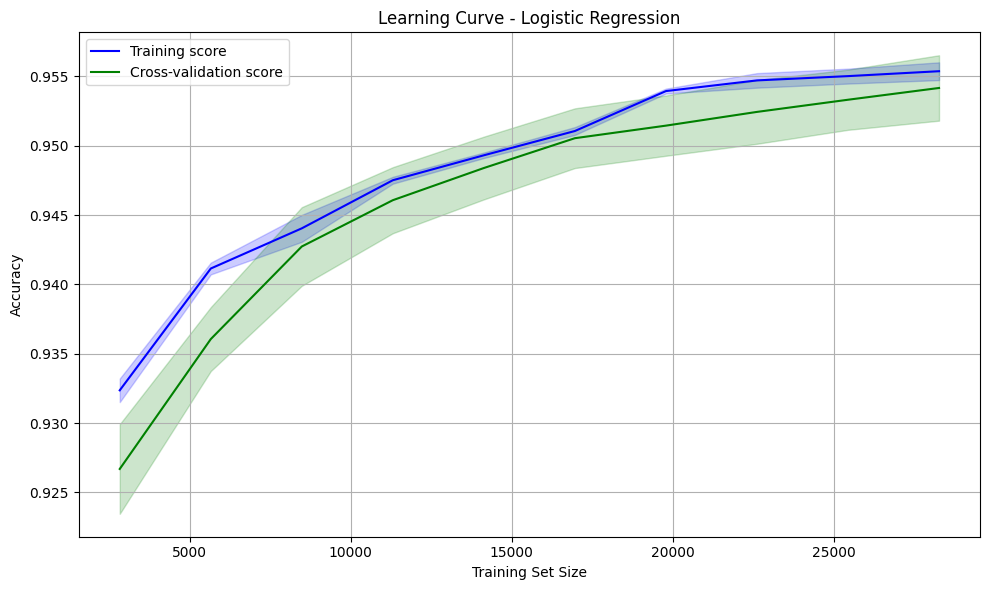

In [20]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    logreg_model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Training score", color="blue")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color="blue")
plt.plot(train_sizes, test_mean, label="Cross-validation score", color="green")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color="green")
plt.title("Learning Curve - Logistic Regression")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout()
plt.savefig("logistic_regression_learning_curve.png")
plt.show()


In [22]:
# Step 1: Imports
import numpy as np
from sklearn.linear_model import LogisticRegression

# Step 2: Load saved embeddings and labels
X_train = np.load("X_train_embeddings.npy")
X_test = np.load("X_test_embeddings.npy")
y_train = np.load("y_train.npy")
y_test = np.load("y_test.npy")

# Step 3: Train Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)

# Now you're ready to use .predict_proba() without error


LogisticRegression(max_iter=1000)

### ROC-AUC and Precision-Recall Curve

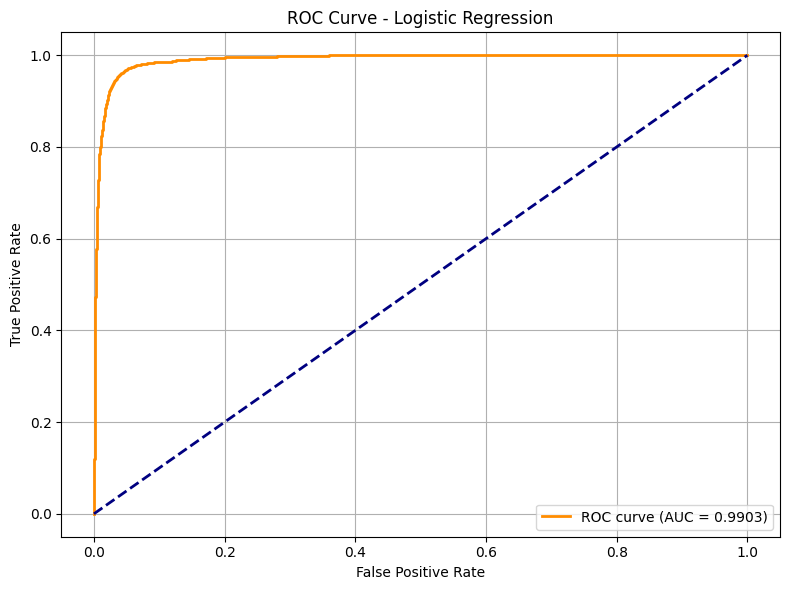

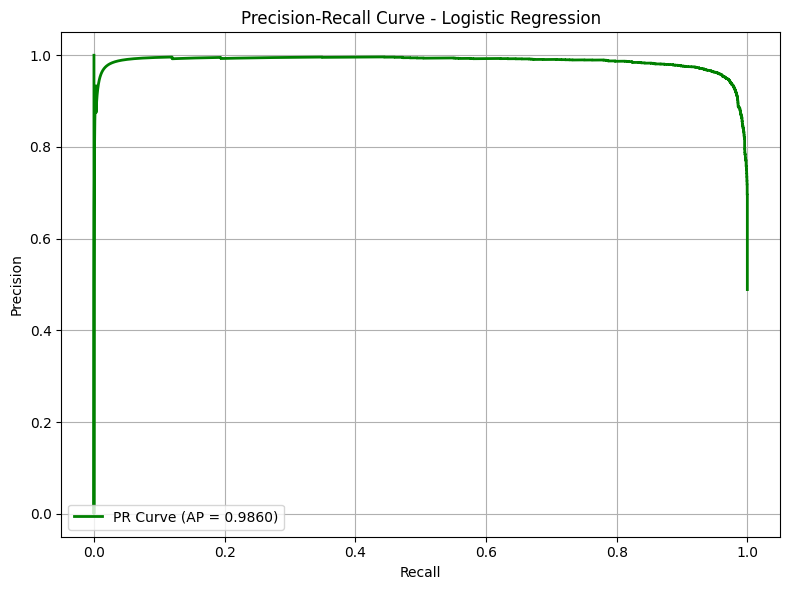

In [23]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import numpy as np

# Get prediction probabilities
y_score_logreg = logreg_model.predict_proba(X_test)[:, 1]  # Probabilities for class 1 (real)

# ----------------- ROC Curve ----------------- #
fpr, tpr, _ = roc_curve(y_test, y_score_logreg)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.savefig("logistic_regression_roc_curve.png")
plt.show()

# ----------------- Precision-Recall Curve ----------------- #
precision, recall, _ = precision_recall_curve(y_test, y_score_logreg)
avg_precision = average_precision_score(y_test, y_score_logreg)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', lw=2, label=f'PR Curve (AP = {avg_precision:.4f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Logistic Regression')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()
plt.savefig("logistic_regression_pr_curve.png")
plt.show()


## Train and Evaluate RandomForest model

In [24]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Load saved embeddings and labels
X_train = np.load("X_train_embeddings.npy")
X_test = np.load("X_test_embeddings.npy")
y_train = np.load("y_train.npy")
y_test = np.load("y_test.npy")

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

### Evaluate Training and Test Performance


Random Forest Accuracy: 0.9527
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      4516
           1       0.95      0.95      0.95      4321

    accuracy                           0.95      8837
   macro avg       0.95      0.95      0.95      8837
weighted avg       0.95      0.95      0.95      8837


Confusion Matrix saved as 'random_forest_confusion_matrix.png'


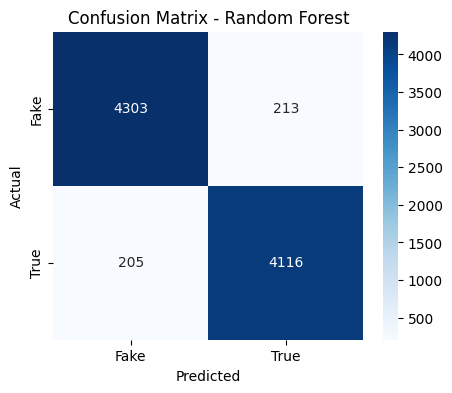

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load transformed dataset
X_train = np.load("X_train_embeddings.npy")  
X_test = np.load("X_test_embeddings.npy")  
y_train = np.load("y_train.npy")  
y_test = np.load("y_test.npy")

# Initialize & train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 trees
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate Performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"\nRandom Forest Accuracy: {accuracy_rf:.4f}")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Blues", xticklabels=["Fake", "True"], yticklabels=["Fake", "True"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")

# Save the plot
rf_confusion_filename = "random_forest_confusion_matrix.png"
plt.savefig(rf_confusion_filename)
print(f"\nConfusion Matrix saved as '{rf_confusion_filename}'")

plt.show()

### k-Fold Cross-Validation for Random Forest



In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Load embeddings
X_train = np.load("X_train_embeddings.npy")
y_train = np.load("y_train.npy")

# Define the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform 5-Fold Cross-Validation
cv_scores_rf = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')

# Output results
print("Cross-Validation Scores:", cv_scores_rf)
print("Mean Accuracy:", round(np.mean(cv_scores_rf), 4))
print("Standard Deviation:", round(np.std(cv_scores_rf), 4))


Cross-Validation Scores: [0.94427157 0.94284906 0.94369784 0.94850757 0.94596124]
Mean Accuracy: 0.9451
Standard Deviation: 0.002


### Learning Curve for Random Forest



Learning curve saved as 'random_forest_learning_curve.png'


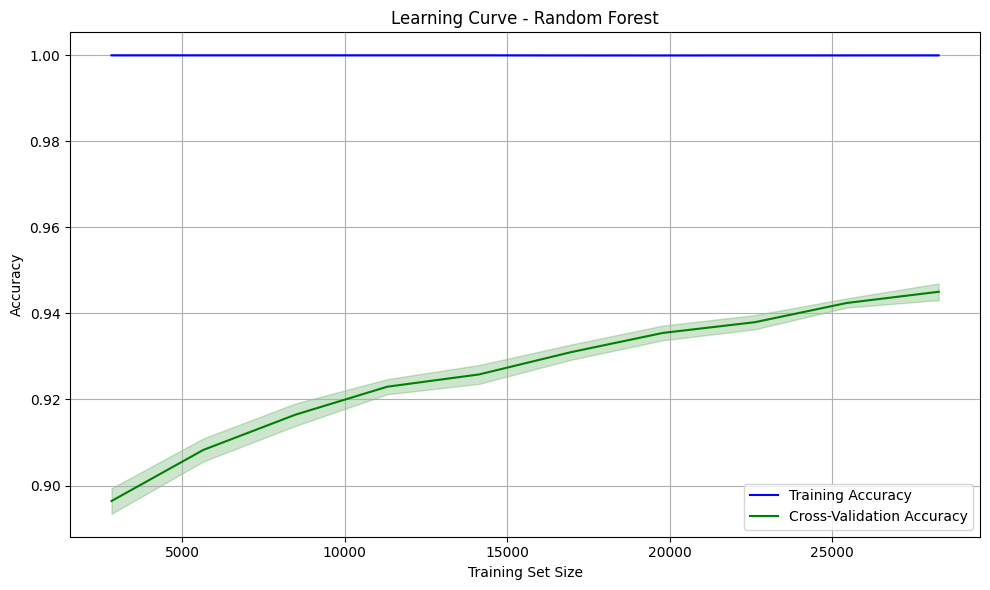

In [28]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Load data
X_train = np.load("X_train_embeddings.npy")
y_train = np.load("y_train.npy")

from sklearn.ensemble import RandomForestClassifier

# Define model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    rf_model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate means and standard deviations
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Training Accuracy", color="blue")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color="blue")
plt.plot(train_sizes, test_mean, label="Cross-Validation Accuracy", color="green")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color="green")
plt.title("Learning Curve - Random Forest")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout()

# Save plot
plt.savefig("random_forest_learning_curve.png")
print("Learning curve saved as 'random_forest_learning_curve.png'")
plt.show()


### ROC & Precision-Recall Curves for Random Forest

ROC curve saved as 'random_forest_roc_curve.png'


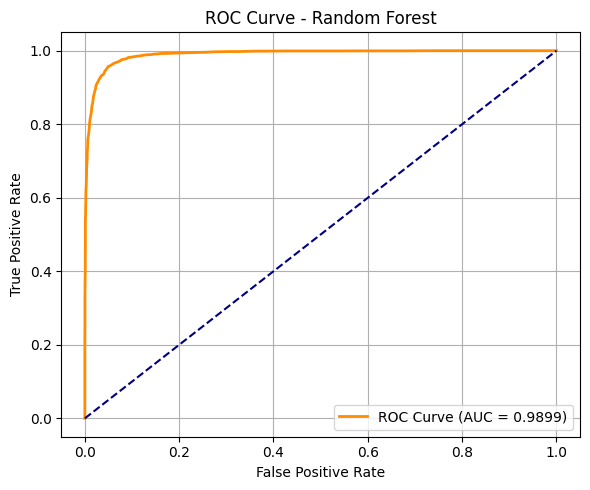

Precision-Recall curve saved as 'random_forest_pr_curve.png'


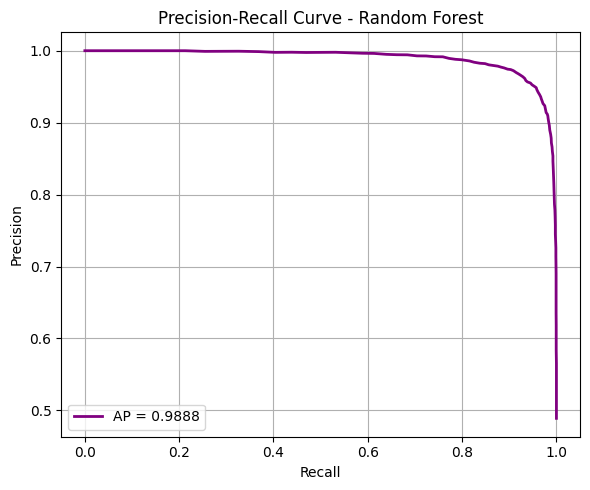

In [29]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import numpy as np

# Load model and data
from sklearn.ensemble import RandomForestClassifier
X_train = np.load("X_train_embeddings.npy")
X_test = np.load("X_test_embeddings.npy")
y_train = np.load("y_train.npy")
y_test = np.load("y_test.npy")

# Re-train model (ensure it's fitted in this notebook context)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get predicted probabilities
y_score_rf = rf_model.predict_proba(X_test)[:, 1]  # Probability of class 1 (True news)

# ----------------- ROC Curve ----------------- #
fpr, tpr, _ = roc_curve(y_test, y_score_rf)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.savefig("random_forest_roc_curve.png")
print("ROC curve saved as 'random_forest_roc_curve.png'")
plt.show()

# ----------------- Precision-Recall Curve ----------------- #
precision, recall, _ = precision_recall_curve(y_test, y_score_rf)
avg_precision = average_precision_score(y_test, y_score_rf)

plt.figure(figsize=(6, 5))
plt.plot(recall, precision, color="purple", lw=2, label=f"AP = {avg_precision:.4f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - Random Forest")
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout()
plt.savefig("random_forest_pr_curve.png")
print("Precision-Recall curve saved as 'random_forest_pr_curve.png'")
plt.show()


In [2]:
import numpy as np

# Load saved embeddings
X_train = np.load("X_train_embeddings.npy")
X_test = np.load("X_test_embeddings.npy")
y_train = np.load("y_train.npy")
y_test = np.load("y_test.npy")

print("Shapes:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


Shapes:
X_train: (35346, 300)
X_test: (8837, 300)
y_train: (35346,)
y_test: (8837,)


### Train and Evaluate SVM Model

In [3]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Train SVM (linear kernel is best for text)
svm_model = SVC(kernel="linear", probability=True)
svm_model.fit(X_train, y_train)

# Evaluate
y_pred_train = svm_model.predict(X_train)
y_pred_test = svm_model.predict(X_test)

print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))

print("\nTraining Classification Report:\n", classification_report(y_train, y_pred_train))
print("\nTest Classification Report:\n", classification_report(y_test, y_pred_test))


Training Accuracy: 0.9642958184801674
Test Accuracy: 0.9643544189204482

Training Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97     18251
           1       0.96      0.97      0.96     17095

    accuracy                           0.96     35346
   macro avg       0.96      0.96      0.96     35346
weighted avg       0.96      0.96      0.96     35346


Test Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96      4516
           1       0.96      0.97      0.96      4321

    accuracy                           0.96      8837
   macro avg       0.96      0.96      0.96      8837
weighted avg       0.96      0.96      0.96      8837



### k-Fold Cross-Validation

In [4]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(svm_model, X_train, y_train, cv=5)
print("\nCross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())



Cross-Validation Scores: [0.96407355 0.9616636  0.96123921 0.96505871 0.95713679]
Mean Accuracy: 0.9618343733611484
Standard Deviation: 0.0027517582177619794


### Learning Curve

/Users/kanchankukreti/miniconda3/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


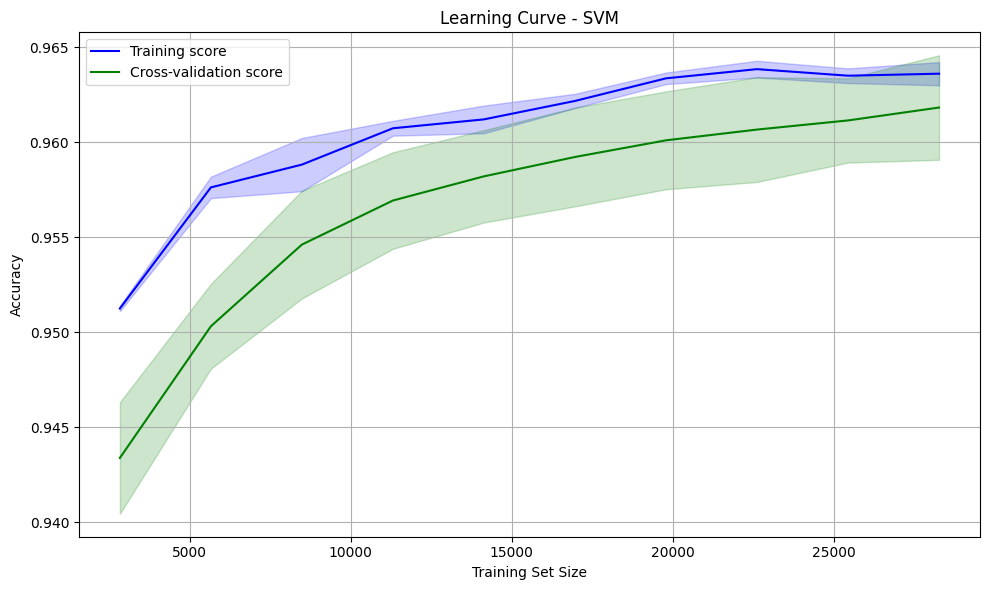

In [5]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    svm_model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Training score", color="blue")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color="blue")
plt.plot(train_sizes, test_mean, label="Cross-validation score", color="green")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color="green")
plt.title("Learning Curve - SVM")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout()
plt.savefig("svm_learning_curve.png")
plt.show()


### ROC and Precision-Recall Curves

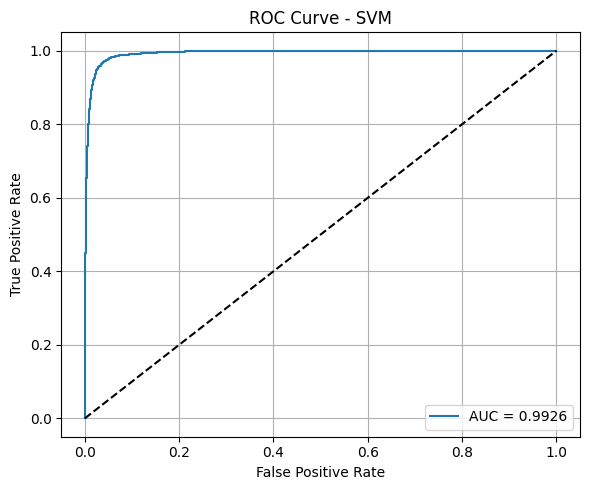

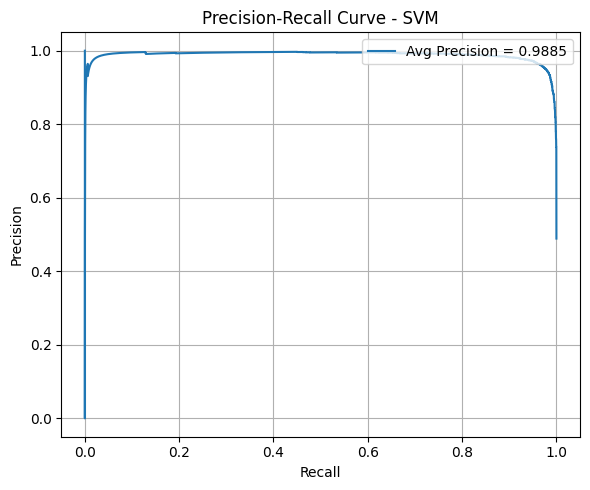

In [6]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

# SVM doesn’t support predict_proba by default; use decision_function
y_scores = svm_model.decision_function(X_test)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
plt.plot([0, 1], [0, 1], "k--")
plt.title("ROC Curve - SVM")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.savefig("svm_roc_curve.png")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_scores)
pr_auc = average_precision_score(y_test, y_scores)

plt.figure(figsize=(6, 5))
plt.plot(recall, precision, label=f"Avg Precision = {pr_auc:.4f}")
plt.title("Precision-Recall Curve - SVM")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="upper right")
plt.grid(True)
plt.tight_layout()
plt.savefig("svm_pr_curve.png")
plt.show()


### Train XGBoost Classifier

In [7]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_train_xgb = xgb_model.predict(X_train)
y_pred_test_xgb = xgb_model.predict(X_test)

# Accuracy & Classification Reports
print("Training Accuracy:", accuracy_score(y_train, y_pred_train_xgb))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test_xgb))

print("\nTraining Classification Report:\n", classification_report(y_train, y_pred_train_xgb))
print("\nTest Classification Report:\n", classification_report(y_test, y_pred_test_xgb))


/Users/kanchankukreti/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:30:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training Accuracy: 1.0
Test Accuracy: 0.9765757610048659

Training Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     18251
           1       1.00      1.00      1.00     17095

    accuracy                           1.00     35346
   macro avg       1.00      1.00      1.00     35346
weighted avg       1.00      1.00      1.00     35346


Test Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      4516
           1       0.97      0.98      0.98      4321

    accuracy                           0.98      8837
   macro avg       0.98      0.98      0.98      8837
weighted avg       0.98      0.98      0.98      8837



### k-Fold Cross-Validation

In [8]:
from sklearn.model_selection import cross_val_score

# Perform 5-Fold Cross-Validation
cv_scores_xgb = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores_xgb)
print("Mean Accuracy:", np.mean(cv_scores_xgb))
print("Standard Deviation:", np.std(cv_scores_xgb))


/Users/kanchankukreti/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:32:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/kanchankukreti/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:32:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/kanchankukreti/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:32:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/kanchankukreti/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:33:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  w

Cross-Validation Scores: [0.97270156 0.97170746 0.97439525 0.97411232 0.96859528]
Mean Accuracy: 0.9723023708712443
Standard Deviation: 0.002093412667390371


### Learning Curve

/Users/kanchankukreti/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:34:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/kanchankukreti/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:34:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/kanchankukreti/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:34:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/kanchankukreti/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:34:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  w

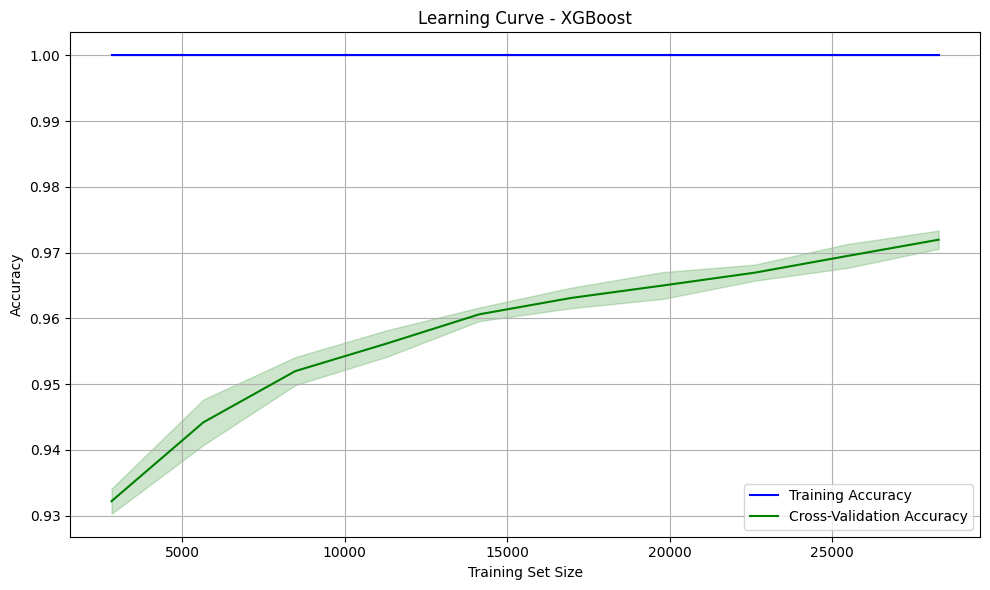

In [9]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(
    xgb_model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Training Accuracy", color="blue")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color="blue")
plt.plot(train_sizes, test_mean, label="Cross-Validation Accuracy", color="green")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color="green")
plt.title("Learning Curve - XGBoost")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout()
plt.savefig("xgboost_learning_curve.png")
plt.show()


### ROC Curve & AUC

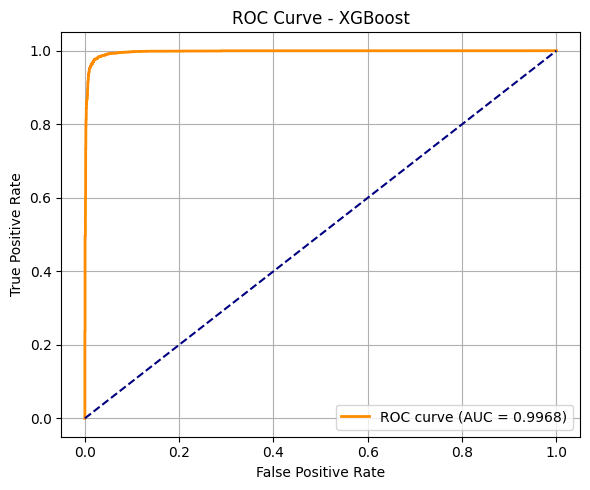

In [10]:
from sklearn.metrics import roc_curve, auc

# Probabilities for class 1 (Real News)
y_score_xgb = xgb_model.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_score_xgb)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.savefig("xgboost_roc_curve.png")
plt.show()


### Precision-Recall Curve & Average Precision Score

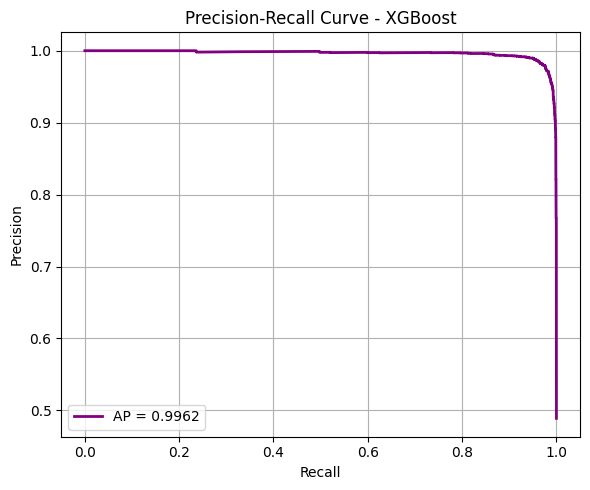

In [11]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_test, y_score_xgb)
avg_precision = average_precision_score(y_test, y_score_xgb)

plt.figure(figsize=(6, 5))
plt.plot(recall, precision, color='purple', lw=2, label='AP = %0.4f' % avg_precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - XGBoost")
plt.legend(loc="lower left")
plt.grid(True)
plt.tight_layout()
plt.savefig("xgboost_pr_curve.png")
plt.show()


### Hyperparameter Tuning:
#### 1. Random Forest(Grid Search)

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

# Load saved embeddings
X_train = np.load("X_train_embeddings.npy")
y_train = np.load("y_train.npy")

# Define parameter grid
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True]
}

# Initialize Random Forest
rf = RandomForestClassifier(random_state=42)

# Grid Search with 3-Fold Cross Validation
grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    cv=3,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

# Fit the model
grid_search_rf.fit(X_train, y_train)

# Best result
print("Best Parameters:", grid_search_rf.best_params_)
print("Best Cross-Validation Accuracy:", grid_search_rf.best_score_)


Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation Accuracy: 0.940361002659424


### Hyperparameter Tuning – SVM (Grid Search)

In [2]:
import numpy as np

# Load saved word embeddings and labels
X_train = np.load("X_train_embeddings.npy")
y_train = np.load("y_train.npy")


In [3]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Use a smaller sample for faster testing
X_sample = X_train[:5000]
y_sample = y_train[:5000]

# Define reduced parameter grid
param_grid_svm = {
    'C': [1, 10],
    'kernel': ['linear'],
    'gamma': ['scale']  # gamma is ignored for linear kernel but kept for format
}

# Initialise SVM and GridSearchCV
svm = SVC(probability=True)
grid_search_svm = GridSearchCV(
    estimator=svm,
    param_grid=param_grid_svm,
    cv=3,
    scoring='accuracy',
    verbose=1,
    n_jobs=1
)

# Fit the model
grid_search_svm.fit(X_sample, y_sample)

# Show best results
print("Best Parameters for SVM:", grid_search_svm.best_params_)
print("Best Cross-Validation Accuracy:", grid_search_svm.best_score_)


Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best Parameters for SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Best Cross-Validation Accuracy: 0.956400796671398


### Load Data and Train the Tuned SVM

In [5]:
import numpy as np
from sklearn.svm import SVC

# Load saved data
X_train = np.load("X_train_embeddings.npy")
X_test = np.load("X_test_embeddings.npy")
y_train = np.load("y_train.npy")
y_test = np.load("y_test.npy")

# Train the SVM model with best hyperparameters
svm_tuned = SVC(C=10, kernel='linear', gamma='scale', probability=True, random_state=42)
svm_tuned.fit(X_train, y_train)


SVC(C=10, kernel='linear', probability=True, random_state=42)

In [1]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load data
X_train = np.load("X_train_embeddings.npy")
X_test = np.load("X_test_embeddings.npy")
y_train = np.load("y_train.npy")
y_test = np.load("y_test.npy")

# Initialise model with best parameters
svm_best = SVC(C=10, kernel='linear', gamma='scale', probability=True, random_state=42)
svm_best.fit(X_train, y_train)

# Predictions
y_pred_train_svm = svm_best.predict(X_train)
y_pred_test_svm = svm_best.predict(X_test)

# Accuracy
print("Training Accuracy:", accuracy_score(y_train, y_pred_train_svm))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test_svm))

# Classification reports
print("\nTraining Classification Report:\n", classification_report(y_train, y_pred_train_svm))
print("\nTest Classification Report:\n", classification_report(y_test, y_pred_test_svm))


Training Accuracy: 0.9713404628529395
Test Accuracy: 0.9703519293878012

Training Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97     18251
           1       0.97      0.98      0.97     17095

    accuracy                           0.97     35346
   macro avg       0.97      0.97      0.97     35346
weighted avg       0.97      0.97      0.97     35346


Test Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      4516
           1       0.97      0.97      0.97      4321

    accuracy                           0.97      8837
   macro avg       0.97      0.97      0.97      8837
weighted avg       0.97      0.97      0.97      8837



### k-Fold Cross-Validation (5-Fold) for Tuned SVM

In [2]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores_svm_tuned = cross_val_score(
    svm_best, X_train, y_train, cv=5, scoring='accuracy'
)

print("Cross-Validation Scores:", cv_scores_svm_tuned)
print("Mean Accuracy:", cv_scores_svm_tuned.mean())
print("Standard Deviation:", cv_scores_svm_tuned.std())


Cross-Validation Scores: [0.96859972 0.96930259 0.9666148  0.97015137 0.96350262]
Mean Accuracy: 0.9676342170118231
Standard Deviation: 0.00237322669193599


### Learning Curve

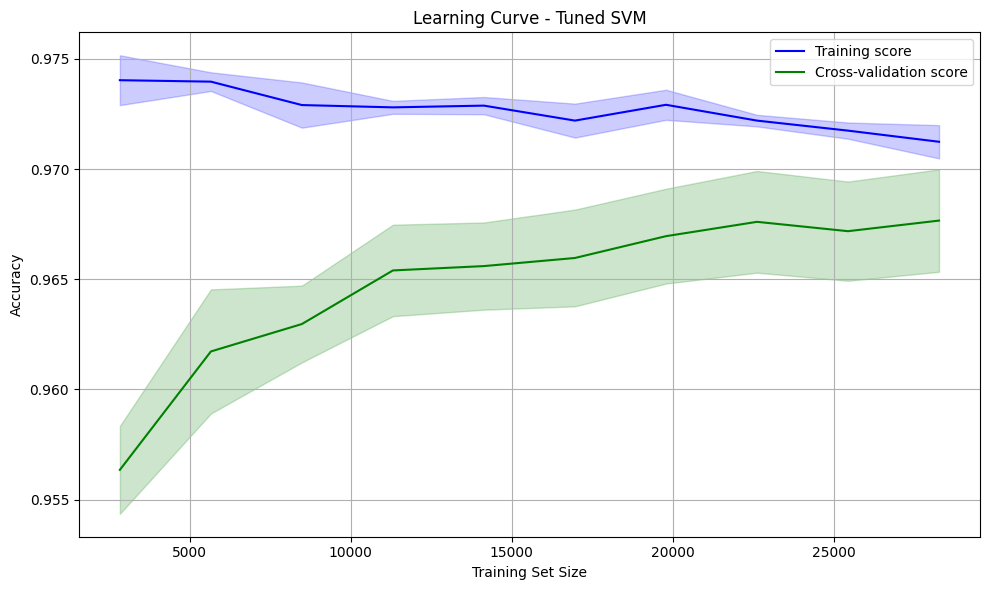

In [3]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Generate learning curve
train_sizes, train_scores, test_scores = learning_curve(
    svm_best, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Training score", color="blue")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color="blue")
plt.plot(train_sizes, test_mean, label="Cross-validation score", color="green")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color="green")
plt.title("Learning Curve - Tuned SVM")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout()
plt.savefig("svm_tuned_learning_curve.png")
plt.show()


### ROC and Precision-Recall Curves

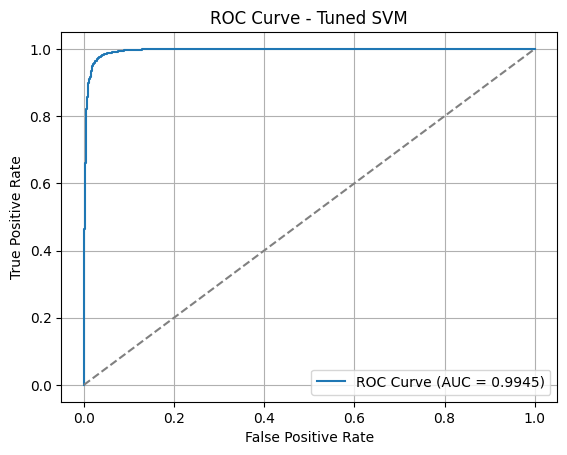

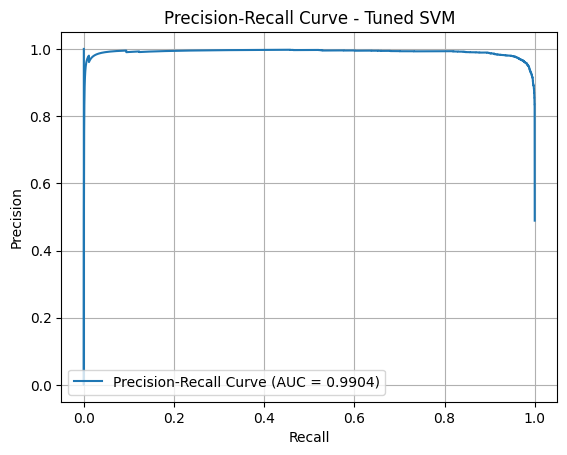

In [4]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities
y_scores_svm = svm_best.decision_function(X_test)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_scores_svm)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Tuned SVM")
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig("svm_tuned_roc_curve.png")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_scores_svm)
pr_auc = auc(recall, precision)

plt.figure()
plt.plot(recall, precision, label=f"Precision-Recall Curve (AUC = {pr_auc:.4f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - Tuned SVM")
plt.legend(loc="lower left")
plt.grid(True)
plt.savefig("svm_tuned_pr_curve.png")
plt.show()


## Hyperparameter Tuning – XGBoost

In [4]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Load training embeddings
X_train = np.load("X_train_embeddings.npy")
y_train = np.load("y_train.npy")

# Use a sample (optional, speeds up tuning)
X_sample = X_train[:5000]
y_sample = y_train[:5000]

# Define parameter grid
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0]
}

# Initialize XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Grid search with 3-fold cross-validation
grid_search_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid_xgb,
    scoring='accuracy',
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Fit the model
grid_search_xgb.fit(X_sample, y_sample)

# Output best parameters and score
print("Best Parameters for XGBoost:", grid_search_xgb.best_params_)
print("Best Cross-Validation Accuracy:", grid_search_xgb.best_score_)


Fitting 3 folds for each of 24 candidates, totalling 72 fits


/Users/kanchankukreti/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:58:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/kanchankukreti/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:58:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/kanchankukreti/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:58:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/kanchankukreti/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:58:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  w

Best Parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
Best Cross-Validation Accuracy: 0.9456005557591963


### Load Saved Word Embeddings

In [5]:
import numpy as np

# Load preprocessed embeddings and labels
X_train = np.load("X_train_embeddings.npy")
X_test = np.load("X_test_embeddings.npy")
y_train = np.load("y_train.npy")
y_test = np.load("y_test.npy")


### Train XGBoost with Best Parameters

In [6]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Initialize model with tuned parameters
xgb_model = xgb.XGBClassifier(
    learning_rate=0.1,
    max_depth=5,
    n_estimators=200,
    subsample=0.8,
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

# Train the model
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_train = xgb_model.predict(X_train)
y_pred_test = xgb_model.predict(X_test)

# Accuracy and Classification Report
print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))
print("\nTraining Classification Report:\n", classification_report(y_train, y_pred_train))
print("\nTest Classification Report:\n", classification_report(y_test, y_pred_test))


/Users/kanchankukreti/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:07:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training Accuracy: 0.9969727833418208
Test Accuracy: 0.9738599072083286

Training Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     18251
           1       1.00      1.00      1.00     17095

    accuracy                           1.00     35346
   macro avg       1.00      1.00      1.00     35346
weighted avg       1.00      1.00      1.00     35346


Test Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      4516
           1       0.97      0.97      0.97      4321

    accuracy                           0.97      8837
   macro avg       0.97      0.97      0.97      8837
weighted avg       0.97      0.97      0.97      8837



### 5-Fold Cross-Validation for tuned XGBoost model:

In [7]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Load training data
import numpy as np
X_train = np.load("X_train_embeddings.npy")
y_train = np.load("y_train.npy")

import xgboost as xgb

# Re-initialize the tuned XGBoost model with best parameters
xgb_tuned = xgb.XGBClassifier(
    learning_rate=0.1,
    max_depth=5,
    n_estimators=200,
    subsample=0.8,
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

# Perform 5-Fold Cross-Validation
cv_scores = cross_val_score(xgb_tuned, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

# Print results
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))
print("Standard Deviation:", np.std(cv_scores))


/Users/kanchankukreti/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:10:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/kanchankukreti/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:10:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/kanchankukreti/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:10:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/kanchankukreti/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:10:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  w

Cross-Validation Scores: [0.97029703 0.97043429 0.97269769 0.97170746 0.96831235]
Mean Accuracy: 0.9706897638412872
Standard Deviation: 0.0014791270629213062


### Learning Curve – Tuned XGBoost

/Users/kanchankukreti/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:32:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/kanchankukreti/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:32:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/kanchankukreti/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:32:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/kanchankukreti/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:32:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  w

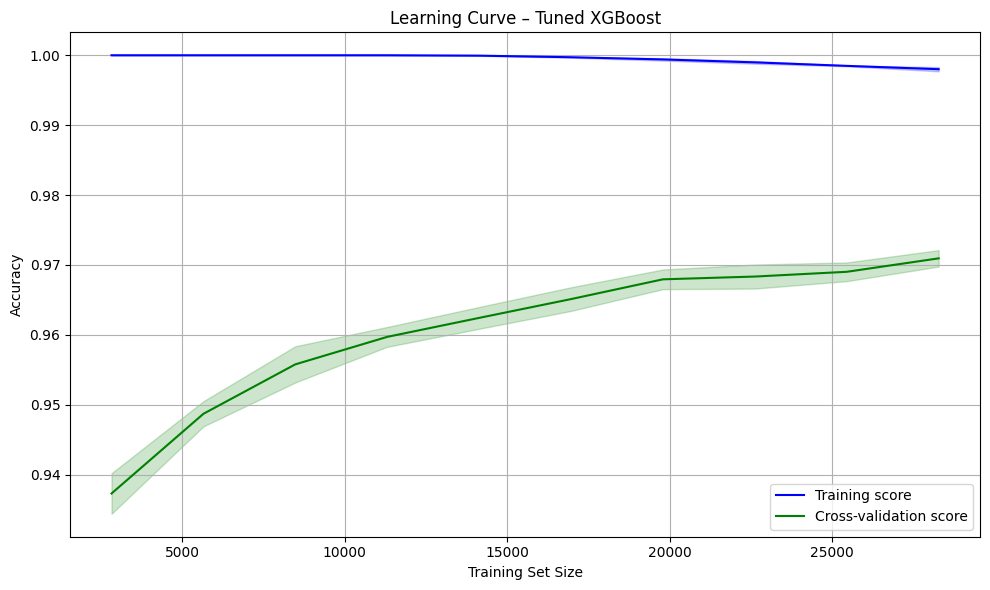

In [8]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb

# Reload tuned model
xgb_tuned = xgb.XGBClassifier(
    learning_rate=0.1,
    max_depth=5,
    n_estimators=200,
    subsample=0.8,
    use_label_encoder=False,
    eval_metric="logloss"
)
xgb_tuned.fit(X_train, y_train)

# Generate learning curve
train_sizes, train_scores, test_scores = learning_curve(
    estimator=xgb_tuned,
    X=X_train,
    y=y_train,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Compute means and stds
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot Learning Curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Training score", color="blue")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color="blue")
plt.plot(train_sizes, test_mean, label="Cross-validation score", color="green")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color="green")
plt.title("Learning Curve – Tuned XGBoost")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout()
plt.savefig("xgboost_tuned_learning_curve.png")
plt.show()


### ROC Curve – Tuned XGBoost

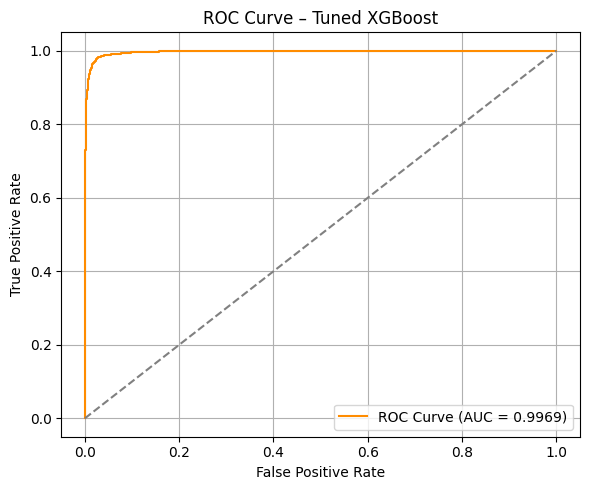

In [9]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities
y_score = xgb_tuned.predict_proba(X_test)[:, 1]

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})", color='darkorange')
plt.plot([0, 1], [0, 1], linestyle="--", color="grey")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Tuned XGBoost")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.savefig("xgboost_tuned_roc_curve.png")
plt.show()


### Precision-Recall Curve – Tuned XGBoost

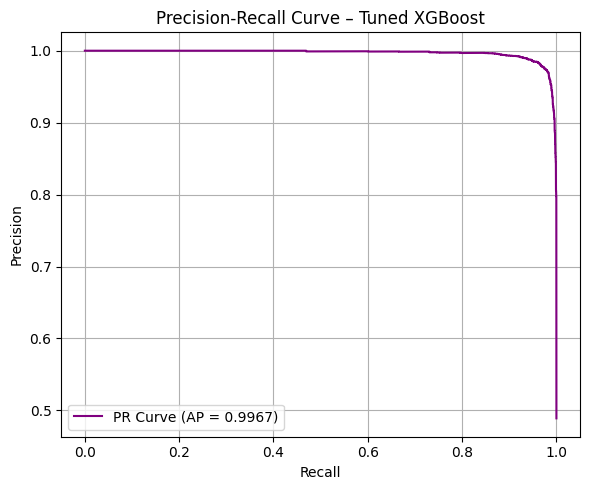

In [10]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_score)
avg_precision = average_precision_score(y_test, y_score)

# Plot
plt.figure(figsize=(6, 5))
plt.plot(recall, precision, label=f"PR Curve (AP = {avg_precision:.4f})", color='purple')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve – Tuned XGBoost")
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout()
plt.savefig("xgboost_tuned_pr_curve.png")
plt.show()


### Hyperparameter-Tuned Random Forest Model

In [11]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load saved data
X_train = np.load("X_train_embeddings.npy")
X_test = np.load("X_test_embeddings.npy")
y_train = np.load("y_train.npy")
y_test = np.load("y_test.npy")

# Train model with best hyperparameters
rf_best = RandomForestClassifier(
    bootstrap=True,
    max_depth=None,
    min_samples_leaf=2,
    min_samples_split=2,
    n_estimators=200,
    random_state=42
)
rf_best.fit(X_train, y_train)

# Predictions
y_pred_train_rf = rf_best.predict(X_train)
y_pred_test_rf = rf_best.predict(X_test)

# Accuracy
print("Training Accuracy:", accuracy_score(y_train, y_pred_train_rf))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test_rf))

# Classification reports
print("\nTraining Classification Report:\n", classification_report(y_train, y_pred_train_rf))
print("\nTest Classification Report:\n", classification_report(y_test, y_pred_test_rf))


Training Accuracy: 0.9995473320884966
Test Accuracy: 0.9512277922371846

Training Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     18251
           1       1.00      1.00      1.00     17095

    accuracy                           1.00     35346
   macro avg       1.00      1.00      1.00     35346
weighted avg       1.00      1.00      1.00     35346


Test Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      4516
           1       0.95      0.95      0.95      4321

    accuracy                           0.95      8837
   macro avg       0.95      0.95      0.95      8837
weighted avg       0.95      0.95      0.95      8837



In [1]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load embeddings
X_train = np.load("X_train_embeddings.npy")
X_test = np.load("X_test_embeddings.npy")
y_train = np.load("y_train.npy")
y_test = np.load("y_test.npy")

# Initialize with best hyperparameters
rf_best = RandomForestClassifier(
    bootstrap=True,
    max_depth=None,
    min_samples_leaf=2,
    min_samples_split=2,
    n_estimators=200,
    random_state=42
)

# Fit model
rf_best.fit(X_train, y_train)

# Predictions
y_pred_train_rf = rf_best.predict(X_train)
y_pred_test_rf = rf_best.predict(X_test)

# Accuracy & Reports
print("Training Accuracy:", accuracy_score(y_train, y_pred_train_rf))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test_rf))
print("\nTraining Classification Report:\n", classification_report(y_train, y_pred_train_rf))
print("\nTest Classification Report:\n", classification_report(y_test, y_pred_test_rf))


Training Accuracy: 0.9995473320884966
Test Accuracy: 0.9512277922371846

Training Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     18251
           1       1.00      1.00      1.00     17095

    accuracy                           1.00     35346
   macro avg       1.00      1.00      1.00     35346
weighted avg       1.00      1.00      1.00     35346


Test Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      4516
           1       0.95      0.95      0.95      4321

    accuracy                           0.95      8837
   macro avg       0.95      0.95      0.95      8837
weighted avg       0.95      0.95      0.95      8837



### k-Fold Cross-Validation

In [2]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf_best, X_train, y_train, cv=5, scoring='accuracy')
print("\nCross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))
print("Standard Deviation:", np.std(cv_scores))



Cross-Validation Scores: [0.94554455 0.94355637 0.94567831 0.94737587 0.94624416]
Mean Accuracy: 0.9456798544474619
Standard Deviation: 0.0012427699002534845


### Learning Curve

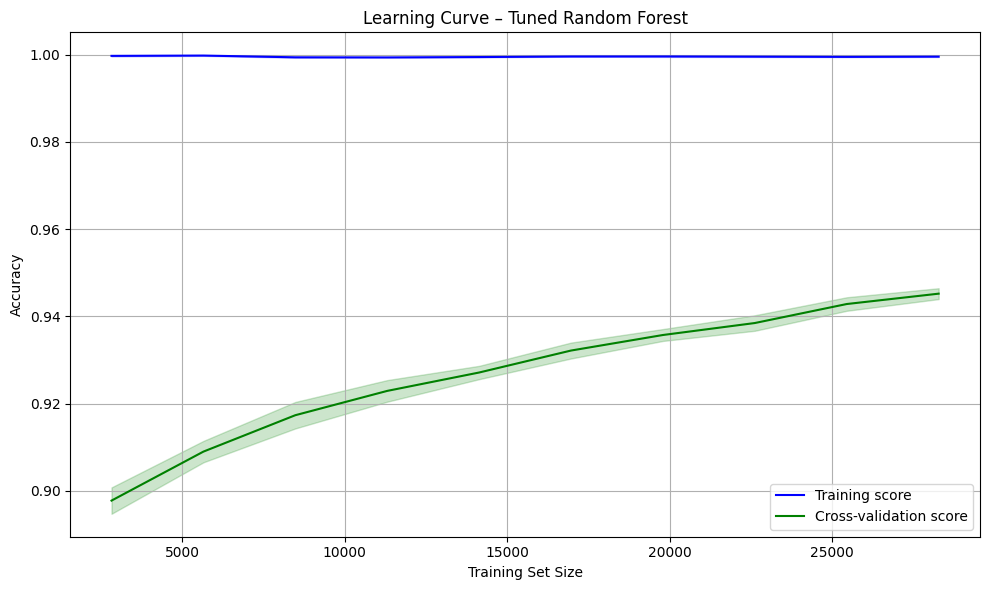

In [3]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(
    rf_best, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Training score", color="blue")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color="blue")
plt.plot(train_sizes, test_mean, label="Cross-validation score", color="green")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color="green")
plt.title("Learning Curve – Tuned Random Forest")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout()
plt.savefig("random_forest_tuned_learning_curve.png")
plt.show()


### ROC Curve & Precision-Recall Curve

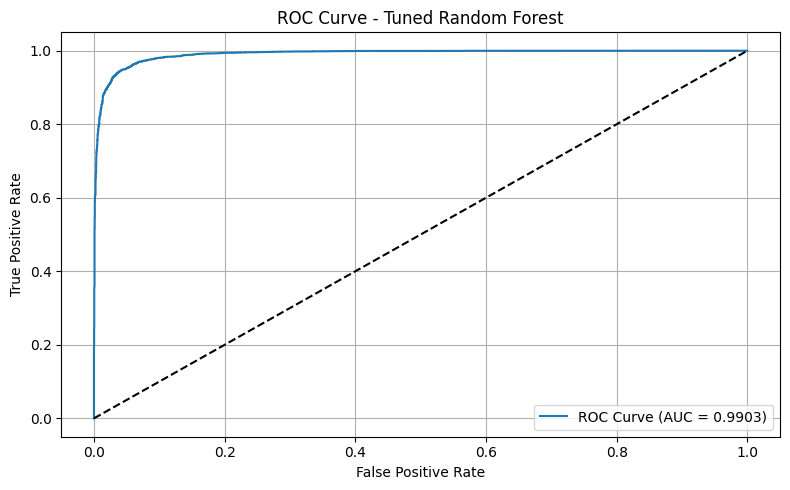

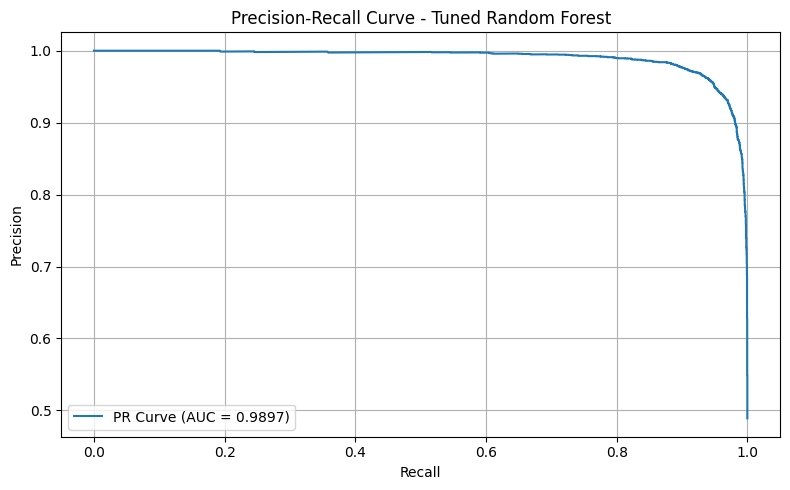

In [4]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc

# Prediction Probabilities
y_probs_rf = rf_best.predict_proba(X_test)[:, 1]

# ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_probs_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 5))
plt.plot(fpr_rf, tpr_rf, label=f"ROC Curve (AUC = {roc_auc_rf:.4f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Tuned Random Forest")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("rf_tuned_roc_curve.png")
plt.show()

# Precision-Recall Curve
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_probs_rf)
pr_auc_rf = auc(recall_rf, precision_rf)

plt.figure(figsize=(8, 5))
plt.plot(recall_rf, precision_rf, label=f"PR Curve (AUC = {pr_auc_rf:.4f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - Tuned Random Forest")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("rf_tuned_pr_curve.png")
plt.show()


### Validate Your Trained LSTM Model

In [20]:
# Re-import essentials if not already
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Load cleaned dataset
data = pd.read_csv("final_ml_ready_dataset.csv")

# Tokenization and Padding
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(data["text_cleaned"])
X_seq = tokenizer.texts_to_sequences(data["text_cleaned"])
X_padded = pad_sequences(X_seq, maxlen=300, padding='post', truncating='post')

y = data["label"].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

# Define LSTM model again
model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=300),
    LSTM(64, return_sequences=True),
    Dropout(0.3),
    LSTM(64),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model (this will create the 'history' variable)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=64)


Epoch 1/5


/Users/kanchankukreti/miniconda3/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


553/553 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7416 - loss: 0.4950 

2025-04-07 18:23:14.394881: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


553/553 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7418 - loss: 0.4947 - val_accuracy: 0.9627 - val_loss: 0.1549
Epoch 2/5
553/553 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - accuracy: 0.8947 - loss: 0.2838 - val_accuracy: 0.6451 - val_loss: 0.5893
Epoch 3/5
553/553 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - accuracy: 0.8037 - loss: 0.4231 - val_accuracy: 0.9585 - val_loss: 0.1658
Epoch 4/5
553/553 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.9535 - loss: 0.1701 - val_accuracy: 0.9706 - val_loss: 0.1095
Epoch 5/5
553/553 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.9753 - loss: 0.0950 - val_accuracy: 0.9750 - val_loss: 0.1028


### ROC & Precision-Recall Curves for LSTM

  5/277 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step  

2025-04-07 18:32:02.057699: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


277/277 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


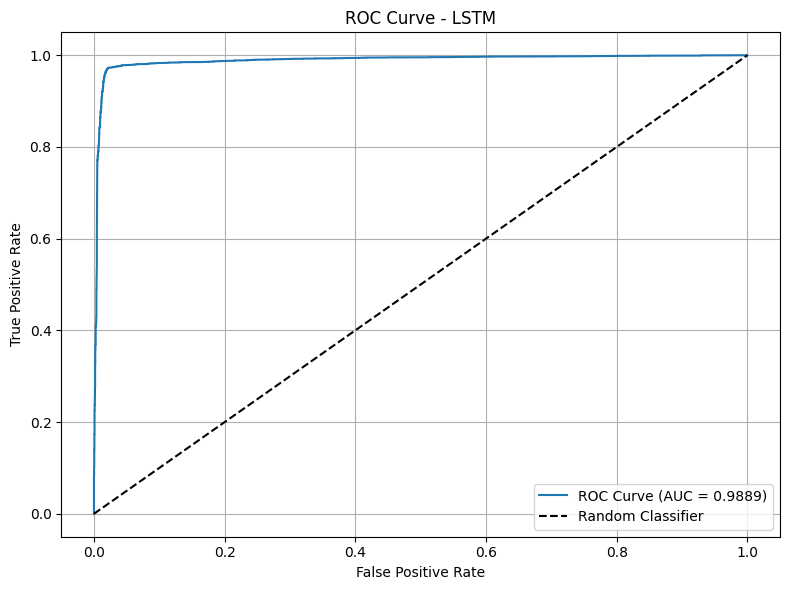

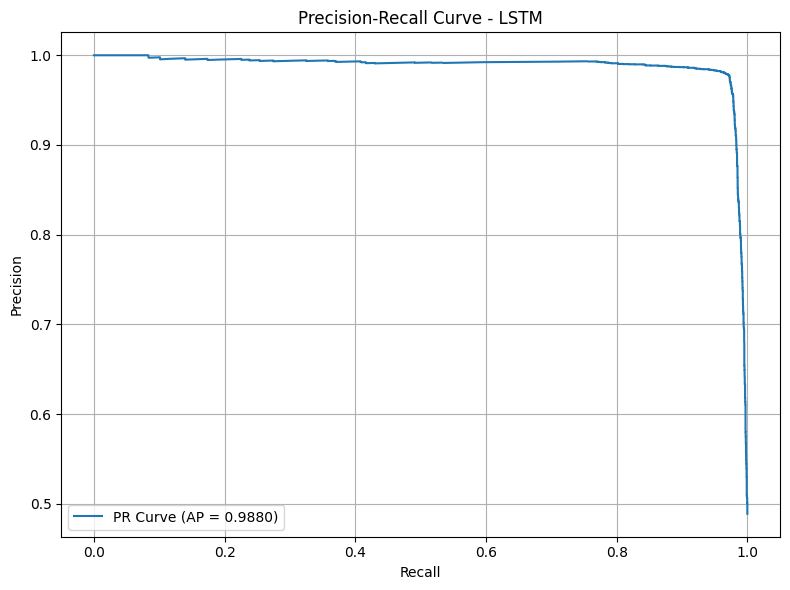

ROC AUC: 0.9889
Average Precision (PR AUC): 0.9880


In [21]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import numpy as np

# Get prediction probabilities
y_probs_lstm = model.predict(X_test).ravel()

# ----------------- ROC Curve ----------------- #
fpr, tpr, _ = roc_curve(y_test, y_probs_lstm)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], "k--", label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - LSTM")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.savefig("lstm_roc_curve.png")
plt.show()

# ----------------- Precision-Recall Curve ----------------- #
precision, recall, _ = precision_recall_curve(y_test, y_probs_lstm)
avg_precision = average_precision_score(y_test, y_probs_lstm)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f"PR Curve (AP = {avg_precision:.4f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - LSTM")
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout()
plt.savefig("lstm_pr_curve.png")
plt.show()

print(f"ROC AUC: {roc_auc:.4f}")
print(f"Average Precision (PR AUC): {avg_precision:.4f}")


### Learning Curves: Accuracy and Loss

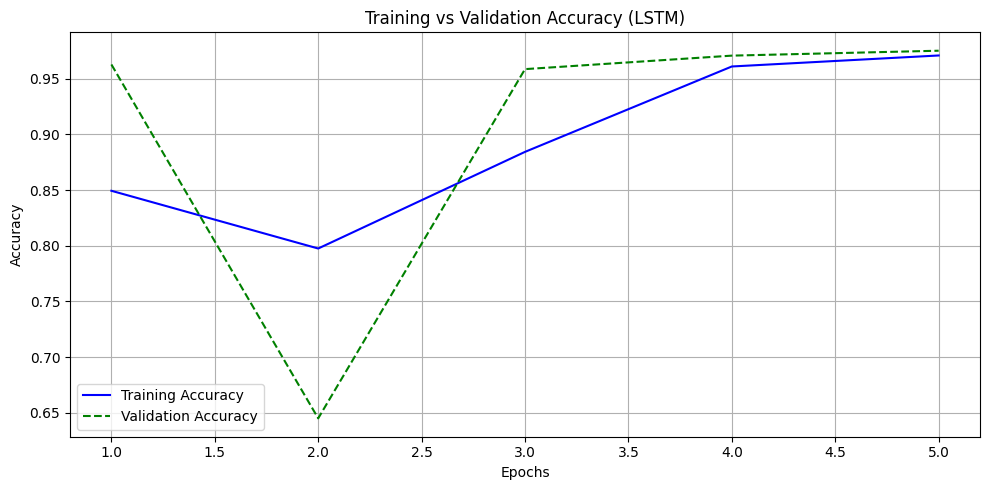

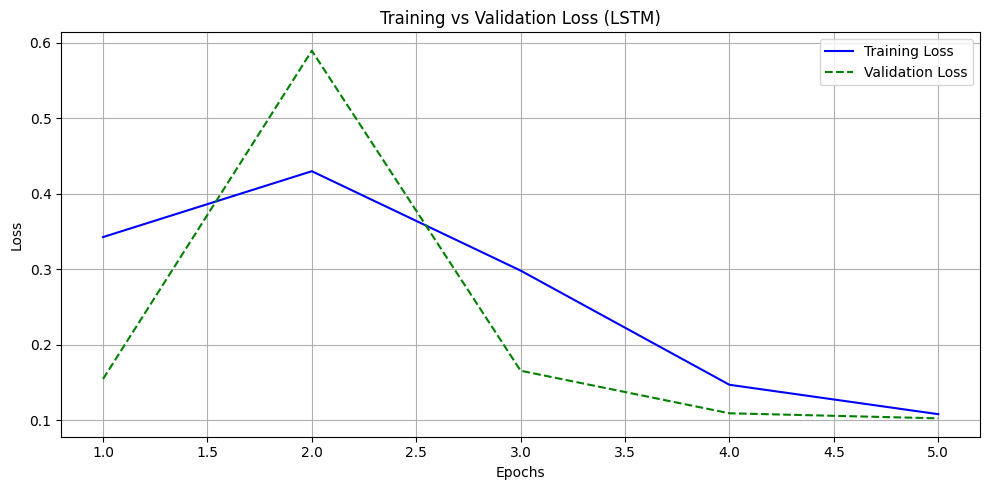

In [22]:
import matplotlib.pyplot as plt

# Extract data from history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Plot Accuracy Curve
plt.figure(figsize=(10, 5))
plt.plot(epochs, acc, 'b-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'g--', label='Validation Accuracy')
plt.title('Training vs Validation Accuracy (LSTM)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("lstm_learning_curve_accuracy.png")
plt.show()

# Plot Loss Curve
plt.figure(figsize=(10, 5))
plt.plot(epochs, loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'g--', label='Validation Loss')
plt.title('Training vs Validation Loss (LSTM)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("lstm_learning_curve_loss.png")
plt.show()


In [23]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=64,
    callbacks=[early_stop]
)


Epoch 1/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 23s 42ms/step - accuracy: 0.7986 - loss: 0.4332 - val_accuracy: 0.6658 - val_loss: 0.6326
Epoch 2/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 19s 35ms/step - accuracy: 0.6835 - loss: 0.5809 - val_accuracy: 0.9821 - val_loss: 0.0994
Epoch 3/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 19s 35ms/step - accuracy: 0.9793 - loss: 0.0998 - val_accuracy: 0.9769 - val_loss: 0.0761
Epoch 4/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 19s 35ms/step - accuracy: 0.9905 - loss: 0.0415 - val_accuracy: 0.9925 - val_loss: 0.0276
Epoch 5/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 19s 35ms/step - accuracy: 0.9945 - loss: 0.0262 - val_accuracy: 0.9810 - val_loss: 0.0883
Epoch 6/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 19s 35ms/step - accuracy: 0.9952 - loss: 0.0227 - val_accuracy: 0.9958 - val_loss: 0.0164
Epoch 7/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 19s 35ms/step - accuracy: 0.9974 - loss: 0.0152 - val_accuracy: 0.9974 - val_loss: 0.0120
Epoch 8/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 19s 35ms/step - accuracy: 0.9983 - loss: 0.0088 - 

### k-Fold Cross-Validation

In [24]:
from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
accuracies = []

for train_idx, val_idx in kf.split(X_padded, y):
    X_train_fold, X_val_fold = X_padded[train_idx], X_padded[val_idx]
    y_train_fold, y_val_fold = y[train_idx], y[val_idx]

    # Define and compile model again here
    # Train, then evaluate
    # Store val accuracy to accuracies list


### ROC Curve and PR Curve for LSTM

277/277 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step 


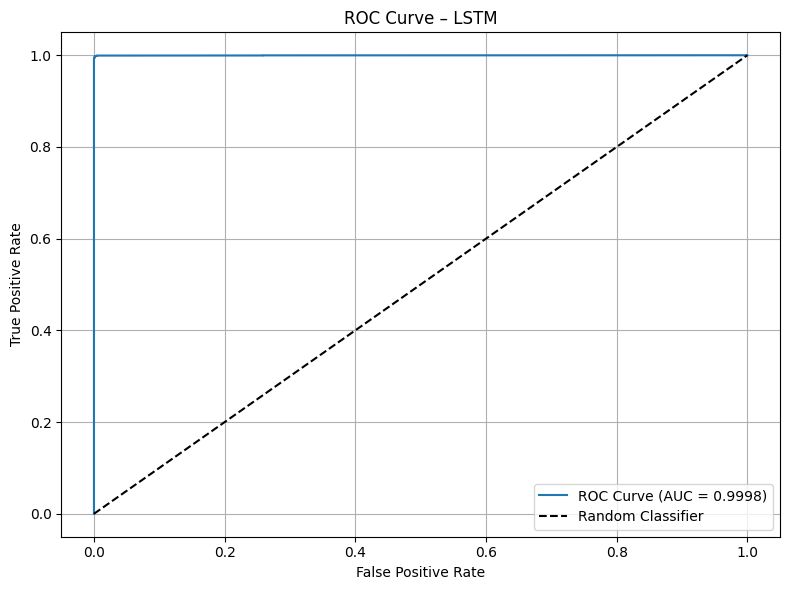

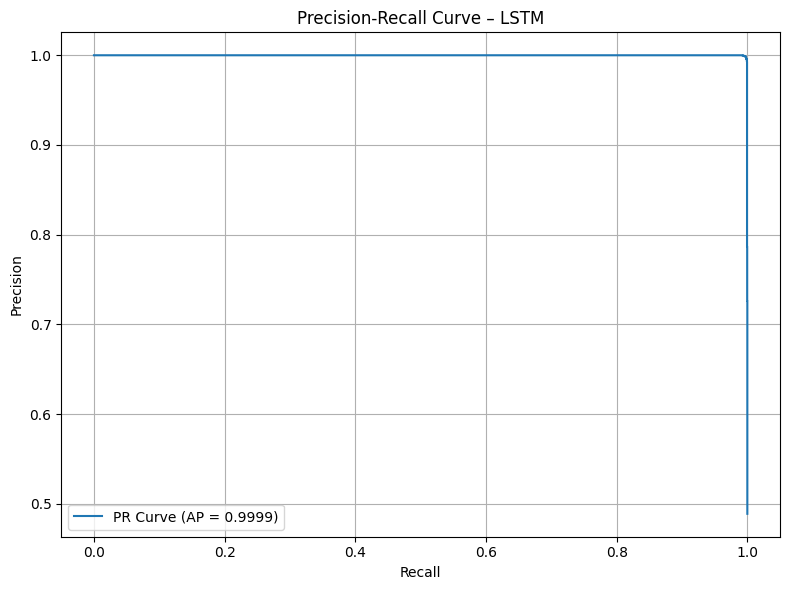

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

# Predict probabilities
y_probs = model.predict(X_test).ravel()  # flatten to 1D

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – LSTM')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.savefig("lstm_roc_curve.png")
plt.show()

# PR Curve
precision, recall, _ = precision_recall_curve(y_test, y_probs)
ap_score = average_precision_score(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR Curve (AP = {ap_score:.4f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve – LSTM')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()
plt.savefig("lstm_pr_curve.png")
plt.show()


### Model Comparison Code

                 Model  Accuracy  Precision  Recall  F1 Score  ROC-AUC  PR-AUC
0  Logistic Regression    0.9593       0.96    0.96      0.96   0.9903  0.9860
1        Random Forest    0.9512       0.95    0.95      0.95   0.9903  0.9897
2                  SVM    0.9704       0.97    0.97      0.97   0.9926  0.9885
3              XGBoost    0.9739       0.98    0.97      0.98   0.9969  0.9967
4                 LSTM    0.9788       0.98    0.98      0.98   0.9998  0.9999
5                 BERT    0.9994       1.00    1.00      1.00   1.0000  1.0000


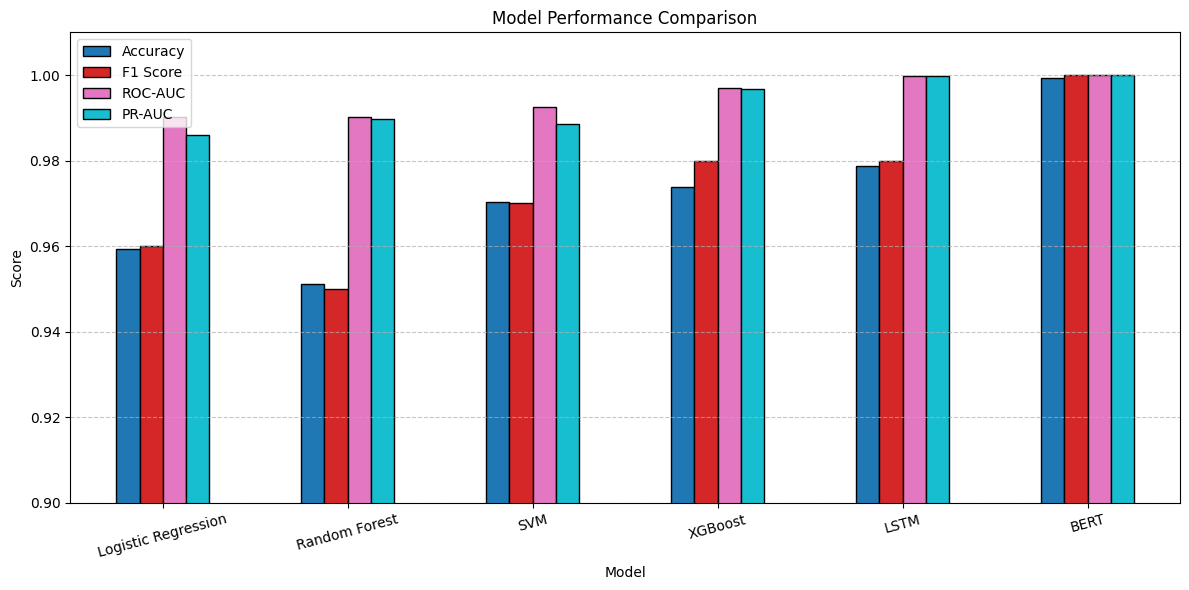

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Define your model performance metrics
model_results = {
    "Model": ["Logistic Regression", "Random Forest", "SVM", "XGBoost", "LSTM", "BERT"],
    "Accuracy": [0.9593, 0.9512, 0.9704, 0.9739, 0.9788, 0.9994],
    "Precision": [0.96, 0.95, 0.97, 0.98, 0.98, 1.00],
    "Recall": [0.96, 0.95, 0.97, 0.97, 0.98, 1.00],
    "F1 Score": [0.96, 0.95, 0.97, 0.98, 0.98, 1.00],
    "ROC-AUC": [0.9903, 0.9903, 0.9926, 0.9969, 0.9998, 1.00],
    "PR-AUC": [0.9860, 0.9897, 0.9885, 0.9967, 0.9999, 1.00]
}

# Step 2: Create DataFrame
df_results = pd.DataFrame(model_results)

# Display the table
print(df_results)

# Step 3: Plot grouped bar chart for key metrics
metrics_to_plot = ["Accuracy", "F1 Score", "ROC-AUC", "PR-AUC"]
df_plot = df_results.set_index("Model")[metrics_to_plot]

# Step 4: Plot
df_plot.plot(kind='bar', figsize=(12, 6), colormap='tab10', edgecolor='black')
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0.90, 1.01)
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("model_comparison_plot.png")
plt.show()
